# **Machine Learing Semester Project**
### NAME: **SAYAB ABBASI**
### ID:   **37182**

# **Article NAME**: Patient Diet Recommendation System through Machine Learning Model


# **DATASET NAME**: Personalized Medical Diet Recommendations Dataset

In [36]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [37]:
df = pd.read_csv("/content/Personalized_Diet_Recommendations.csv")

In [38]:
df

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet


In [39]:
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [40]:
df.tail()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
4995,P04996,42,Female,172,99,33.46,NaN,115,78,279,...,59,356,64,Western,Spicy,2869,70,402,68,Low-Carb Diet
4996,P04997,39,Female,155,61,25.39,NaN,110,97,258,...,119,164,112,Indian,NaN,1138,131,213,107,Low-Carb Diet
4997,P04998,48,Female,165,61,22.41,Diabetes,113,82,183,...,50,351,41,Mediterranean,Spicy,2893,40,380,34,Low-Carb Diet
4998,P04999,34,Other,151,82,35.96,Heart Disease,105,75,248,...,50,397,131,Asian,Salty,2201,56,367,128,Low-Fat Diet
4999,P05000,72,Other,173,98,32.74,NaN,121,105,292,...,184,234,67,Indian,NaN,2869,200,188,74,Low-Carb Diet


In [41]:
df.describe()

,Age,Height_cm,Weight_kg,BMI,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,Daily_Steps,Exercise_Frequency,Sleep_Hours,Caloric_Intake,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,174.244000,84.36620,28.353134,133.982400,89.735800,224.297800,159.33020,8458.922800,2.978200,7.019680,2347.350200,124.781800,248.590000,84.522600,2046.236000,129.287000,248.328600,89.029400
std,17.906991,14.229173,20.18103,8.297745,26.216215,17.283025,42.918923,52.14943,3742.408853,2.001431,1.716133,659.880146,43.280037,86.535683,37.495091,671.380142,43.914252,91.152909,38.336083
min,18.000000,150.000000,50.00000,12.630000,90.000000,60.000000,150.000000,70.00000,2004.000000,0.000000,4.000000,1200.000000,50.000000,100.000000,20.000000,725.000000,40.000000,50.000000,10.000000
25%,34.000000,162.000000,67.00000,21.850000,111.000000,75.000000,187.000000,114.00000,5278.750000,1.000000,5.600000,1777.000000,87.000000,175.000000,52.000000,1478.000000,92.000000,173.000000,56.000000
50%,49.000000,174.000000,84.00000,27.640000,133.000000,90.000000,224.000000,160.00000,8452.000000,3.000000,7.000000,2350.500000,126.000000,249.000000,85.000000,2044.000000,129.000000,246.000000,89.000000
75%,64.000000,186.000000,102.00000,33.812500,157.000000,105.000000,261.000000,204.00000,11671.750000,5.000000,8.500000,2921.250000,162.000000,325.000000,116.000000,2621.000000,166.000000,324.000000,121.000000
max,79.000000,199.000000,119.00000,52.890000,179.000000,119.000000,299.000000,249.00000,14997.000000,6.000000,10.000000,3499.000000,199.000000,399.000000,149.000000,3372.000000,218.000000,447.000000,168.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           2957 non-null   object 
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   object 
 12  Allergies                 1503 non-null   object 
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

In [43]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Chronic_Disease,2043
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Cholesterol_Level,0


# **Data Set Summry**

| **Type**              | **Examples**                                                                                                    | **Description**                 |
| --------------------- | --------------------------------------------------------------------------------------------------------------- | ------------------------------- |
| **Demographics**      | `Age`, `Gender`, `Height_cm`, `Weight_kg`                                                                       | Basic patient info              |
| **Health Indicators** | `BMI`, `Blood_Pressure`, `Cholesterol_Level`, `Blood_Sugar_Level`                                               | Key medical metrics             |
| **Medical History**   | `Chronic_Disease`, `Genetic_Risk_Factor`, `Allergies`                                                           | Existing conditions and risks   |
| **Lifestyle**         | `Daily_Steps`, `Exercise_Frequency`, `Sleep_Hours`, `Smoking_Habit`, `Alcohol_Consumption`                      | Behavior patterns               |
| **Dietary Intake**    | `Caloric_Intake`, `Protein_Intake`, `Carbohydrate_Intake`, `Fat_Intake`, `Preferred_Cuisine`, `Food_Aversions`  | Actual diet consumed            |
| **Recommendations**   | `Recommended_Calories`, `Recommended_Protein`, `Recommended_Carbs`, `Recommended_Fats`, `Recommended_Meal_Plan` | Personalized nutritional advice |


In [44]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Chronic_Disease    2043
Allergies          3497
Food_Aversions     1225
dtype: int64


In [45]:
desease_count = df['Chronic_Disease'].value_counts()
print(desease_count)

Chronic_Disease
Diabetes         1019
Heart Disease     749
Hypertension      693
Obesity           496
Name: count, dtype: int64


In [46]:
unique_dietary_habits = df['Dietary_Habits'].dropna().unique()

print("Unique Dietary Habits:")
for habit in sorted(unique_dietary_habits):
    print("-", habit)

Unique Dietary Habits:
- Keto
- Regular
- Vegan
- Vegetarian


In [47]:
df['Recommended_Meal_Plan'].value_counts()


,count
Recommended_Meal_Plan,
Low-Fat Diet,1313
High-Protein Diet,1255
Balanced Diet,1250
Low-Carb Diet,1182


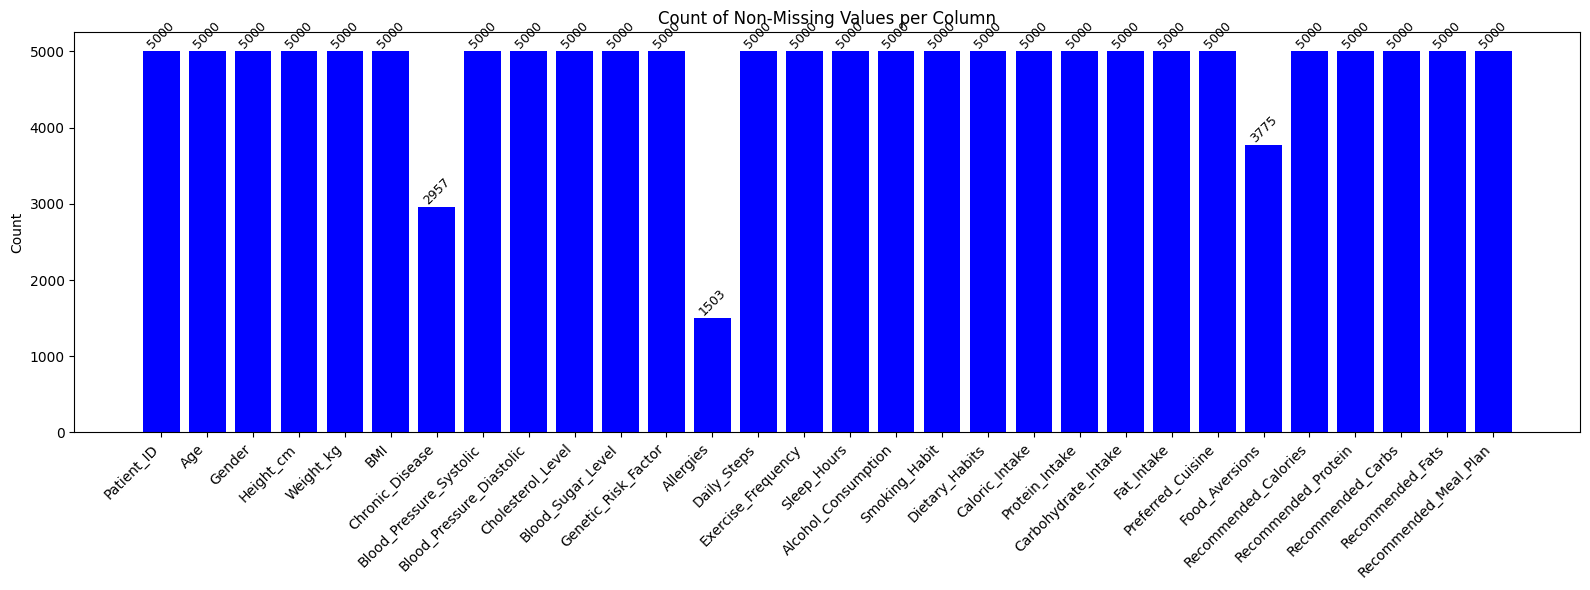

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


non_missing_counts = df.notnull().sum()


plt.figure(figsize=(16, 6))
bars = plt.bar(non_missing_counts.index, non_missing_counts.values, color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', rotation=45, fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title("Count of Non-Missing Values per Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# **Preprocessing**

In [49]:
# Creating Smart_Diet from logic
df['Smart_Diet'] = df.apply(
    lambda row: 'Low Calorie' if row['Caloric_Intake'] < 2000 else
                'High Protein' if row['Protein_Intake'] > 100 else
                'Balanced', axis=1)

# Map Smart_Diet to Recommended_Meal_Plan
df['Recommended_Meal_Plan'] = df['Smart_Diet'].map({
    'Low Calorie': 'Keto',
    'High Protein': 'Paleo',
    'Balanced': 'Mediterranean'
})

In [50]:
df['Recommended_Meal_Plan'].value_counts()

,count
Recommended_Meal_Plan,
Paleo,2173
Keto,1732
Mediterranean,1095


In [51]:
# Separating columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numeric columns with median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical columns with mode
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))


print("Missing values filled: median for numeric, mode for categorical")


# df.dropna(inplace=True)


Missing values filled: median for numeric, mode for categorical


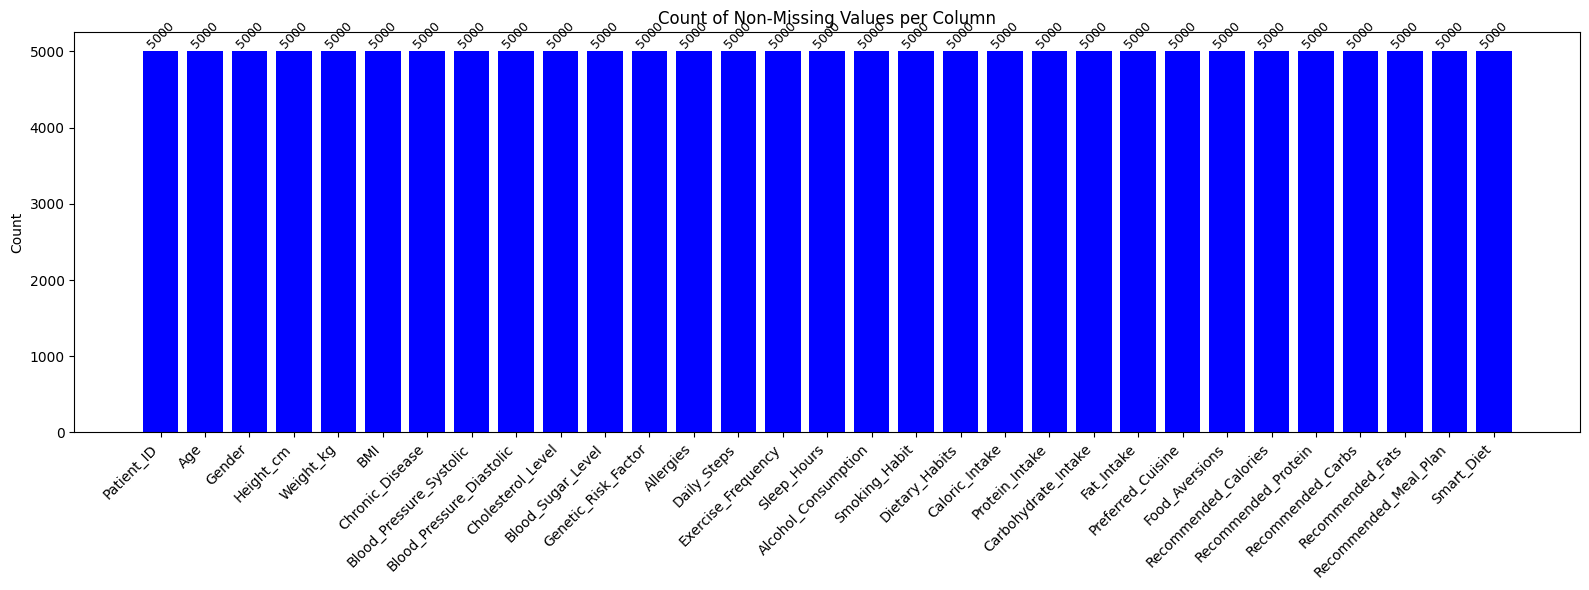

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


non_missing_counts = df.notnull().sum()


plt.figure(figsize=(16, 6))
bars = plt.bar(non_missing_counts.index, non_missing_counts.values, color='blue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
             ha='center', va='bottom', rotation=45, fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title("Count of Non-Missing Values per Column")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [53]:
# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns.difference(['Smart_Diet', 'Recommended_Meal_Plan'])
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [54]:
# Encode target labels BEFORE train_test_split
le_sd = LabelEncoder()
le_rmp = LabelEncoder()

df['Smart_Diet'] = le_sd.fit_transform(df['Smart_Diet'])
df['Recommended_Meal_Plan'] = le_rmp.fit_transform(df['Recommended_Meal_Plan'])


In [55]:
# Define features and targets
X = df.drop(['Smart_Diet', 'Recommended_Meal_Plan'], axis=1)
y = df[['Smart_Diet', 'Recommended_Meal_Plan']].copy()

In [56]:
# Check class distributions
print(f"Smart_Diet distribution: {Counter(y['Smart_Diet'])}")
print(f"Recommended_Meal_Plan distribution: {Counter(y['Recommended_Meal_Plan'])}")

Smart_Diet distribution: Counter({1: 2173, 2: 1732, 0: 1095})
Recommended_Meal_Plan distribution: Counter({2: 2173, 0: 1732, 1: 1095})


# **BEFORE SMOTE**

In [57]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [58]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [59]:
# Check for NaN values
if np.any(np.isnan(X_train_scaled)) or y_train.isna().any().any():
    raise ValueError("NaN values found in X_train_scaled or y_train")

In [60]:
# Before SMOTE Balance Smart_Diet
y_train_sd = y_train['Smart_Diet'].astype(int)
print(f"Before-SMOTE Smart_Diet distribution: {Counter(y_train_sd)}")

Before-SMOTE Smart_Diet distribution: Counter({1: 1738, 2: 1386, 0: 876})


In [61]:
sd_counts = Counter(y_train_sd)
min_class_samples = min(sd_counts.values())
k_neighbors_safe = max(1, min(min_class_samples - 1, 5))

smote = SMOTE(k_neighbors=k_neighbors_safe, random_state=42)
X_train_bal_sd, y_train_bal_sd = smote.fit_resample(X_train_scaled, y_train_sd)
y_train_bal_sd = y_train_bal_sd.astype(int)
print(f"After-SMOTE Smart_Diet distribution: {Counter(y_train_bal_sd)}")


After-SMOTE Smart_Diet distribution: Counter({1: 1738, 2: 1738, 0: 1738})


In [62]:
# Align Recommended_Meal_Plan with resampled Smart_Diet
original_indices = np.arange(len(X_train_scaled))
class_counts_before = Counter(y_train_sd)
class_counts_after = Counter(y_train_bal_sd)
sample_indices = []
for label in class_counts_after:
    original_mask = y_train_sd == label
    original_idx = original_indices[original_mask]
    n_original = class_counts_before[label]
    n_total = class_counts_after[label]
    sample_indices.extend(original_idx)
    if n_total > n_original:
        sample_indices.extend(np.repeat(original_idx[:1], n_total - n_original))
sample_indices = np.array(sample_indices)

y_train_bal = y_train.iloc[sample_indices].reset_index(drop=True)
y_train_bal['Smart_Diet'] = y_train_bal_sd

In [63]:
# SMOTE Balance Recommended_Meal_Plan
y_train_rmp = y_train_bal['Recommended_Meal_Plan'].astype(int)
if y_train_rmp.isna().any():
    raise ValueError("NaN values in y_train_bal['Recommended_Meal_Plan']")
print(f"Before-SMOTE Recommended_Meal_Plan distribution: {Counter(y_train_rmp)}")

rmp_counts = Counter(y_train_rmp)
min_class_samples = min(rmp_counts.values())
k_neighbors_safe = max(1, min(min_class_samples - 1, 5))

smote = SMOTE(k_neighbors=k_neighbors_safe, random_state=42)
X_train_bal, y_train_bal_rmp = smote.fit_resample(X_train_bal_sd, y_train_rmp)

y_train_bal_rmp = y_train_bal_rmp.astype(int)
print(f"After-SMOTE Recommended_Meal_Plan distribution: {Counter(y_train_bal_rmp)}")


Before-SMOTE Recommended_Meal_Plan distribution: Counter({2: 1738, 0: 1738, 1: 1738})
After-SMOTE Recommended_Meal_Plan distribution: Counter({2: 1738, 0: 1738, 1: 1738})


In [64]:
# Re-align Smart_Diet with resampled Recommended_Meal_Plan
original_indices = np.arange(len(y_train_bal))
class_counts_before = Counter(y_train_bal['Recommended_Meal_Plan'])
class_counts_after = Counter(y_train_bal_rmp)
sample_indices = []
for label in class_counts_after:
    original_mask = y_train_bal['Recommended_Meal_Plan'] == label
    original_idx = original_indices[original_mask]
    n_original = class_counts_before[label]
    n_total = class_counts_after[label]
    sample_indices.extend(original_idx)
    if n_total > n_original:
        sample_indices.extend(np.repeat(original_idx[:1], n_total - n_original))
sample_indices = np.array(sample_indices)

In [65]:
y_train_bal = y_train_bal.iloc[sample_indices].reset_index(drop=True)
y_train_bal['Recommended_Meal_Plan'] = y_train_bal_rmp
y_train_bal['Smart_Diet'] = y_train_bal['Smart_Diet'].astype(int)
print(f"y_train_bal dtypes: {y_train_bal.dtypes}")


y_train_bal dtypes: Smart_Diet               int64
Recommended_Meal_Plan    int64
dtype: object


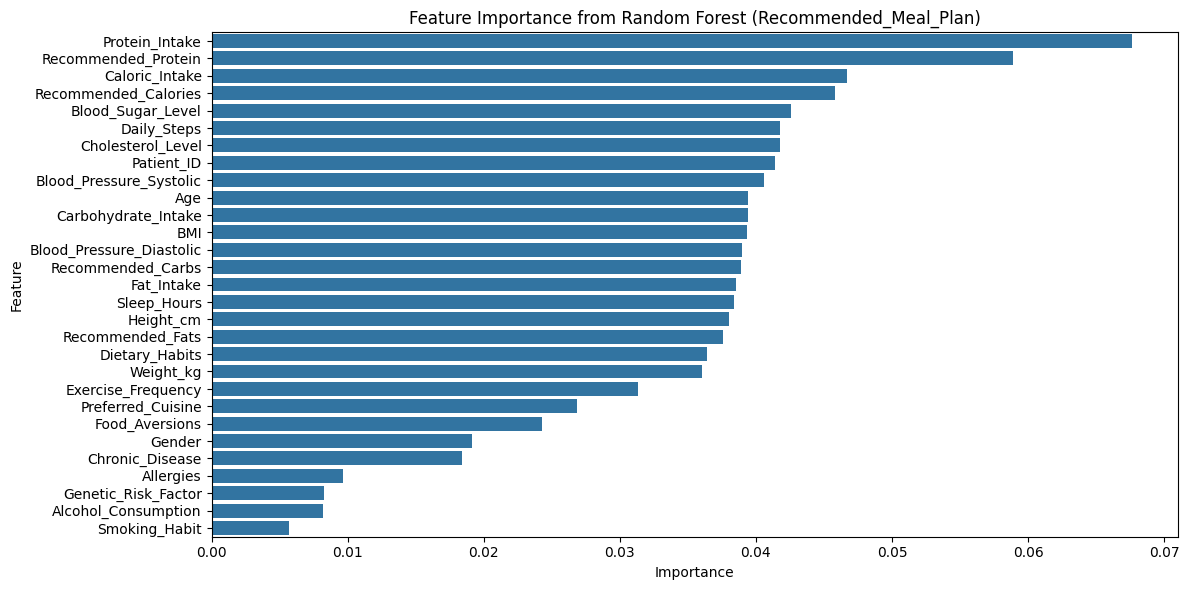

In [66]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train on Recommended_Meal_Plan balanced data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal_rmp)

# Get feature importances
importances = rf.feature_importances_

# Assuming X_train_bal comes from X_train_scaled with these columns:
feature_names = df.drop(columns=['Smart_Diet', 'Recommended_Meal_Plan']).columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest (Recommended_Meal_Plan)')
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer

# Verify columns
print("Columns in DataFrame:", df.columns.tolist())

# Add noise to reduce deterministic mapping
np.random.seed(42)
df['Carbohydrate_Intake'] += np.random.normal(0, 20, df.shape[0])
df['Fat_Intake'] += np.random.normal(0, 15, df.shape[0])

# Redefine target with adjusted thresholds
df['Smart_Diet'] = df.apply(
    lambda row: 'Low Carb' if row['Carbohydrate_Intake'] < 180 else
                'High Fat' if row['Fat_Intake'] > 90 else
                'Balanced', axis=1)
df['Recommended_Meal_Plan'] = df['Smart_Diet'].map({
    'Low Carb': 'Keto',
    'High Fat': 'Paleo',
    'Balanced': 'Mediterranean'
})
df = df.drop(columns=['Smart_Diet'])

# Drop non-predictive columns
columns_to_drop = [col for col in ['Patient_ID', 'BMI'] if col in df.columns]
df = df.drop(columns=columns_to_drop)

# Impute missing values before encoding
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
for col in ['Chronic_Disease', 'Allergies', 'Food_Aversions']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# Check for highly correlated features
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
high_corr = [(i, j) for i in corr_matrix for j in corr_matrix if corr_matrix.loc[i, j] > 0.8 and i < j]
print("Highly correlated features:", high_corr)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns.difference(['Recommended_Meal_Plan'])
encoders = {}
for col in cat_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

# Encode target column
le_rmp = LabelEncoder()
df['Recommended_Meal_Plan'] = le_rmp.fit_transform(df['Recommended_Meal_Plan'])
print("Class mappings:", dict(zip(range(len(le_rmp.classes_)), le_rmp.classes_)))

# Split features and target
X = df.drop(columns=['Recommended_Meal_Plan'])
y = df['Recommended_Meal_Plan']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 8: Print class distribution
train_class_counts = pd.Series(y_train).value_counts()
print("Training set class distribution:", train_class_counts.to_dict())

# Apply SMOTE with corrected sampling strategy
smote = SMOTE(
    sampling_strategy={0: 1646, 1: 1646, 2: 1646},  # Balance classes
    random_state=42,
    k_neighbors=5
)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Feature selection using Random Forest
rf_for_selection = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_for_selection.fit(X_train_scaled, y_train_bal)
selector = SelectFromModel(rf_for_selection, prefit=True, threshold="0.5*mean")
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
print("Selected features shape:", X_train_selected.shape)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected features:", selected_features)
print("Feature importances:", dict(zip(X.columns, rf_for_selection.feature_importances_)))

# Define tuned classifiers
models = {
    "XGBoost": XGBClassifier(
        max_depth=3, reg_lambda=12.0, reg_alpha=10.0, subsample=0.7, colsample_bytree=0.7,
        eval_metric='mlogloss', random_state=42
    ),
    "Logistic Regression": GridSearchCV(
        LogisticRegression(max_iter=2000, random_state=42),
        param_grid={
            'C': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0],
            'solver': ['lbfgs', 'saga'],
            'class_weight': ['balanced']
        },
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    ),
    "SVM": GridSearchCV(
        SVC(probability=True),
        param_grid={
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        },
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
}

# Train and evaluate models
for name, model in models.items():
    print(f"\n{name}")

    model.fit(X_train_selected, y_train_bal)
    y_pred = model.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy:", round(acc * 100, 2))
    print("F1 Score:", round(f1, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_rmp.classes_))

    cv_scores = cross_val_score(model, X_train_selected, y_train_bal, cv=5, scoring='accuracy')
    print("Cross-Validation Accuracy (mean ± std):", f"{cv_scores.mean() * 100:.2f}% ± {cv_scores.std() * 100:.2f}%")

    cm = confusion_matrix(y_test, y_pred)
    # visualize confusion matrix
    # plt.figure(figsize=(6, 4))
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'Confusion Matrix - {name}')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.tight_layout()
    # plt.show()

    print("--" * 40)

Columns in DataFrame: ['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Chronic_Disease', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level', 'Genetic_Risk_Factor', 'Allergies', 'Daily_Steps', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits', 'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake', 'Preferred_Cuisine', 'Food_Aversions', 'Recommended_Calories', 'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats', 'Recommended_Meal_Plan']
Highly correlated features: [('Caloric_Intake', 'Recommended_Calories'), ('Protein_Intake', 'Recommended_Protein'), ('Carbohydrate_Intake', 'Recommended_Carbs')]
Class mappings: {0: 'Keto', 1: 'Mediterranean', 2: 'Paleo'}
Training set class distribution: {1: 1558, 2: 1347, 0: 1095}
Selected features shape: (4938, 4)
Selected features: ['Carbohydrate_Intake', 'Fat_Intake', 'Recommended_Carbs', 'Recommended_Fats']
Feature importances: {'Age': np

In [69]:
import joblib

# Save classifiers
joblib.dump(models["Logistic Regression"], 'meal_recommend_model.pkl')


['meal_recommend_model.pkl']

In [70]:
from google.colab import files

files.download('meal_recommend_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Cross Validation**

In [ ]:

from sklearn.model_selection import cross_val_score
j
for name, model in models.items():
    print(f"\n{name} (Cross-Validation Accuracy)")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print("CV Mean Accuracy:", scores.mean())
    print("CV Std Dev:", scores.std())


# **Applying Ensemble**

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

LogisticRegression(penalty='l1', solver='saga')

# Train Logistic Regression GridSearchCV
logreg_model = models["Logistic Regression"]
logreg_model.fit(X_train_selected, y_train_bal)

# Extract the best model
best_logistic_regression = logreg_model.best_estimator_



xgb_model = XGBClassifier(
    max_depth=2, reg_lambda=6.0, reg_alpha=5.0, eval_metric='mlogloss', random_state=42
)
xgb_model.fit(X_train_selected, y_train_bal)
best_xgboost_model = xgb_model


In [72]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('lr', best_logistic_regression),
    ('xgb', best_xgboost_model)
], voting='soft')

ensemble.fit(X_train_selected, y_train_bal)
y_pred = ensemble.predict(X_test_selected)

from sklearn.metrics import accuracy_score, f1_score, classification_report

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Ensemble Accuracy:", acc * 100)
print("Ensemble F1 Score:", f1)
print("Classification Report:\n", classification_report(
    y_test, y_pred, target_names=le_rmp.classes_.astype(str)
))


Ensemble Accuracy: 99.7
Ensemble F1 Score: 0.9970019870839542
Classification Report:
                precision    recall  f1-score   support

         Keto       0.99      1.00      0.99       274
Mediterranean       1.00      1.00      1.00       390
        Paleo       1.00      1.00      1.00       336

     accuracy                           1.00      1000
    macro avg       1.00      1.00      1.00      1000
 weighted avg       1.00      1.00      1.00      1000



# **Disease Prediction Model**

In [76]:
# ------------------ Imports ------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# ------------------ Load & Add Noise ------------------
np.random.seed(42)
df['Carbohydrate_Intake'] += np.random.normal(0, 20, df.shape[0])
df['Fat_Intake'] += np.random.normal(0, 15, df.shape[0])

# ------------------ Create Targets ------------------
df['Smart_Diet'] = df.apply(
    lambda row: 'Low Carb' if row['Carbohydrate_Intake'] < 180 else
                'High Fat' if row['Fat_Intake'] > 90 else
                'Balanced', axis=1)

df['Recommended_Meal_Plan'] = df['Smart_Diet'].map({
    'Low Carb': 'Keto',
    'High Fat': 'Paleo',
    'Balanced': 'Mediterranean'
})
df.drop(columns=['Smart_Diet'], inplace=True)

# ------------------ Handle Missing Values ------------------
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
for col in ['Chronic_Disease', 'Allergies', 'Food_Aversions']:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# ------------------ Feature Engineering ------------------
def compute_health_score(row):
    score = 0
    if row['Blood_Pressure_Systolic'] >= 140 or row['Blood_Pressure_Diastolic'] >= 90:
        score += 2
    elif row['Blood_Pressure_Systolic'] <= 90 or row['Blood_Pressure_Diastolic'] <= 60:
        score += 1
    if row['Cholesterol_Level'] == 'High':
        score += 2
    if row['Blood_Sugar_Level'] == 'High':
        score += 2
    return score

def compute_risk_profile(row):
    score = 0
    if row['Chronic_Disease'] != 'None':
        score += 2
    if row['Genetic_Risk_Factor'] != 'None':
        score += 2
    if row['Smoking_Habit'] != 'Non-Smoker':
        score += 1
    if row['Alcohol_Consumption'] != 'None':
        score += 1
    if 'BMI' in df.columns and row['BMI'] > 30:
        score += 2
    return score

df['Health_Score'] = df.apply(compute_health_score, axis=1)
df['Risk_Score'] = df.apply(compute_risk_profile, axis=1)

# ------------------ Drop Unnecessary Columns ------------------
df.drop(columns=[col for col in ['Patient_ID', 'BMI'] if col in df.columns], inplace=True)

# ------------------ Encode Categorical Features ------------------
cat_cols = df.select_dtypes(include='object').columns.difference(['Recommended_Meal_Plan'])
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Encode target
le_rmp = LabelEncoder()
df['Recommended_Meal_Plan'] = le_rmp.fit_transform(df['Recommended_Meal_Plan'])

# ------------------ Train-Test Split ------------------
X = df.drop(columns=['Recommended_Meal_Plan'])
y = df['Recommended_Meal_Plan']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# ------------------ SMOTE Balancing ------------------
print("Original training class distribution:", Counter(y_train))

max_count = max(Counter(y_train).values())
sampling_strategy = {cls: max_count for cls in np.unique(y_train)}

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_bal))

# Add small noise to prevent memorization
X_train_bal += np.random.normal(0, 0.01, X_train_bal.shape)

# ------------------ Scaling ------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# ------------------ Feature Selection ------------------
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train_bal)
selector = SelectFromModel(rf, threshold="1.0*mean", prefit=True)

X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

# ------------------ Model Setup ------------------
models = {
    "SVM": SVC(
        kernel='rbf', C=1.0, gamma='scale', class_weight='balanced',
        probability=True, random_state=42
    ),
}

# ------------------ Evaluation ------------------
for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train_sel, y_train_bal)
    y_pred = model.predict(X_test_sel)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Accuracy:", round(acc * 100, 2), "%")
    print("F1 Score:", round(f1, 4))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le_rmp.classes_))

    cv = cross_val_score(model, X_train_sel, y_train_bal, cv=5, scoring='accuracy')
    print(f"CV Accuracy: {cv.mean() * 100:.2f}% ± {cv.std() * 100:.2f}%")
    print("-" * 80)


import joblib
joblib.dump(models["SVM"], 'disease_rec_model.pkl')

# Download disease_rec_model
from google.colab import files
files.download('disease_rec_model.pkl')


Original training class distribution: Counter({1: 1470, 2: 1295, 0: 1235})
After SMOTE: Counter({0: 1470, 1: 1470, 2: 1470})
Selected Features: ['Carbohydrate_Intake', 'Fat_Intake', 'Recommended_Carbs']

Model: SVM
Accuracy: 98.2 %
F1 Score: 0.982
Classification Report:
                precision    recall  f1-score   support

         Keto       0.97      0.98      0.98       309
Mediterranean       0.98      0.99      0.99       367
        Paleo       0.99      0.98      0.98       324

     accuracy                           0.98      1000
    macro avg       0.98      0.98      0.98      1000
 weighted avg       0.98      0.98      0.98      1000

CV Accuracy: 98.23% ± 0.46%
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Nutriention Model**

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import pandas as pd
import joblib

# Your dataset
df = pd.DataFrame({
    'Disease': ['Diabetes', 'Hypertension', 'Obesity', 'High Cholesterol'] * 10,
    'Meal_Plan': ['Keto', 'Mediterranean', 'Paleo', 'Low-Fat Diet'] * 10,
    'Calories': [1800, 2200, 2500, 1900] * 10,
    'Protein': [100, 120, 180, 130] * 10,
    'Fat': [160, 80, 110, 50] * 10,
    'Carbohydrates': [50, 200, 120, 250] * 10
})

# Define input X and output y
X = df[['Disease', 'Meal_Plan']]
y = df[['Calories', 'Protein', 'Fat', 'Carbohydrates']]

# Define column transformer with OneHotEncoder
categorical_features = ['Disease', 'Meal_Plan']
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build and train full pipeline with model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)))
])

pipeline.fit(X, y)

# Save pipeline
joblib.dump(pipeline, 'nutrition_model.pkl')
print(" Saved trained model pipeline with OneHotEncoder.")


# Load model
pipeline = joblib.load('nutrition_model.pkl')

# Create new input
new_input = pd.DataFrame([{
    'Disease': 'Obesity',
    'Meal_Plan': 'Paleo'
}])

# Predict nutrients
predicted_nutrients = pipeline.predict(new_input)
print(" Predicted Nutrient Targets:", predicted_nutrients)

from google.colab import files

files.download('nutrition_model.pkl')


 Saved trained model pipeline with OneHotEncoder.
 Predicted Nutrient Targets: [[2500.  180.  110.  120.]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Diet & Disease Recommendation System**

In [166]:
# ------------------ Diet & Disease Recommendation System ------------------

import pandas as pd
import numpy as np
import joblib

# Load trained pipeline (includes encoder + model)
nutrient_pipeline = joblib.load("/content/nutrient_pipeline.pkl")  # Trained Pipeline with OneHotEncoder + MultiOutputRegressor

# Step 1: Symptom-to-Disease Mapping
symptoms_map = {
    'Diabetes': ['excessive thirst', 'frequent urination', 'fatigue'],
    'Hypertension': ['headache', 'chest pain', 'vision problems'],
    'Obesity': ['weight gain', 'snoring', 'joint pain'],
    'High Cholesterol': ['chest pain', 'numbness', 'slurred speech']
}

# Step 2: Diet Guidance for Diseases
disease_diet = {
    'Diabetes': 'Low sugar, low carb meals with high fiber content.',
    'Hypertension': 'Low sodium, high potassium diet rich in fruits and vegetables.',
    'Obesity': 'Calorie-deficit meals with high protein and low fat.',
    'High Cholesterol': 'Low saturated fat and high fiber diet, avoid red meat.'
}

# Step 3: Exercise Recommendations
exercise_recommendation = {
    'Diabetes': 'Brisk walking, cycling, swimming, yoga.',
    'Hypertension': 'Walking, stretching, light aerobics.',
    'Obesity': 'Cardio workouts, HIIT, walking.',
    'High Cholesterol': 'Aerobic exercises, swimming, jogging.'
}

# Step 4: Smart Diet Classification Logic
def recommend_meal(calories, protein, fat, carbs):
    if carbs < 150 and calories < 2000:
        return 'Low Carb', 'Keto'
    elif fat > 100 and protein > 150:
        return 'High Fat & Protein', 'Paleo'
    elif protein > 140 and fat < 80:
        return 'High Protein', 'High-Protein Diet'
    elif fat < 60 and 1800 < calories < 2500:
        return 'Low Fat', 'Low-Fat Diet'
    else:
        return 'Balanced', 'Mediterranean'

# Step 5: Meal Plan Descriptions
plan_descriptions = {
    'Keto': 'Focus on low carbs, moderate protein, and high fat. Prioritize avocados, eggs, fish, and nuts.',
    'Paleo': 'Whole foods like meat, fish, veggies, fruits. Avoid grains and processed foods. Promotes high protein and healthy fats from natural sources.',
    'Mediterranean': 'Balanced meals with olive oil, nuts, legumes, lean meats. Emphasizes healthy fats and complex carbohydrates.',
    'Low-Fat Diet': 'Minimize fat, increase complex carbs and lean protein. Focus on fruits, veggies, whole grains.',
    'High-Protein Diet': 'High lean protein, moderate carbs and fat for muscle maintenance. Ideal for active individuals and weight control.'
}

# Step 6: Main Function
def full_recommendation_system():
    name = input("Enter your name: ")
    knows_disease = input("Do you know your disease? (yes/no): ").strip().lower()

    # Step 6A: Disease Detection
    if knows_disease == 'yes':
        disease = input("Enter your disease (Diabetes/Hypertension/Obesity/High Cholesterol): ").strip().title()
    else:
        print("\nAnswer the following symptoms (yes/no):")
        scores = {}
        for condition, symptoms in symptoms_map.items():
            scores[condition] = sum(
                input(f"Do you have {symptom}? ").strip().lower() == 'yes'
                for symptom in symptoms
            )
        disease = max(scores, key=scores.get)

    print(f"\nPredicted Disease: {disease}")
    print("Dietary Recommendation:", disease_diet[disease])
    print("Recommended Exercise:", exercise_recommendation[disease])

    # Step 6B: User Nutritional Intake
    calories = float(input("Enter your daily calorie intake: "))
    protein = float(input("Enter your daily protein intake (g): "))
    fat = float(input("Enter your daily fat intake (g): "))
    carbs = float(input("Enter your daily carbohydrate intake (g): "))

    # Step 6C: Recommend Smart Diet & Plan
    smart_diet, meal_plan = recommend_meal(calories, protein, fat, carbs)
    print(f"\nSmart Diet Category: {smart_diet}")
    print(f"Recommended Meal Plan: {meal_plan}")
    print(plan_descriptions[meal_plan])

    # Step 6D: Predict Nutritional Targets using ML pipeline
    input_df = pd.DataFrame([{"Disease": disease, "Meal_Plan": meal_plan}])
    predictions = nutrient_pipeline.predict(input_df)

    target_cal, target_prot, target_fat, target_carb = predictions[0]
    print(f"\nSuggested Daily Targets (based on your profile):")
    print(f"Calories: ~{int(target_cal)} kcal")
    print(f"Protein: {int(target_prot)}g")
    print(f"Fat: {int(target_fat)}g")
    print(f"Carbohydrates: {int(target_carb)}g")





In [167]:
full_recommendation_system()

Enter your name: SAYAB
Do you know your disease? (yes/no): yes
Enter your disease (Diabetes/Hypertension/Obesity/High Cholesterol): Diabetes

Predicted Disease: Diabetes
Dietary Recommendation: Low sugar, low carb meals with high fiber content.
Recommended Exercise: Brisk walking, cycling, swimming, yoga.
Enter your daily calorie intake: 199
Enter your daily protein intake (g): 22
Enter your daily fat intake (g): 21
Enter your daily carbohydrate intake (g): 32

Smart Diet Category: Low Carb
Recommended Meal Plan: Keto
Focus on low carbs, moderate protein, and high fat. Prioritize avocados, eggs, fish, and nuts.

Suggested Daily Targets (based on your profile):
Calories: ~1800 kcal
Protein: 100g
Fat: 160g
Carbohydrates: 50g
